In [1]:
#importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


#cargamos el dataset jamboree
ruta = r'C:/Users/matia/OneDrive/Escritorio/Curso_The_Corner/jamboree/jamboree_dataset.csv'
df = pd.read_csv(ruta) 
df.head()

C:\Users\matia\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
#cambiamos el nombre de las columnas
df = df.rename(columns={'Serial No.':'SERIALNUMBER', 'GRE Score':'GRE', 'TOEFL Score':'TOEFL', 'University Rating': 'UNIVERSITYRATING', 'Research':'RESEARCH', 'Chance of Admit ':'CHANCEOFADMIT'})

array([[<AxesSubplot:title={'center':'GRE'}>,
        <AxesSubplot:title={'center':'TOEFL'}>,
        <AxesSubplot:title={'center':'UNIVERSITYRATING'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'RESEARCH'}>,
        <AxesSubplot:title={'center':'CHANCEOFADMIT'}>, <AxesSubplot:>]],
      dtype=object)

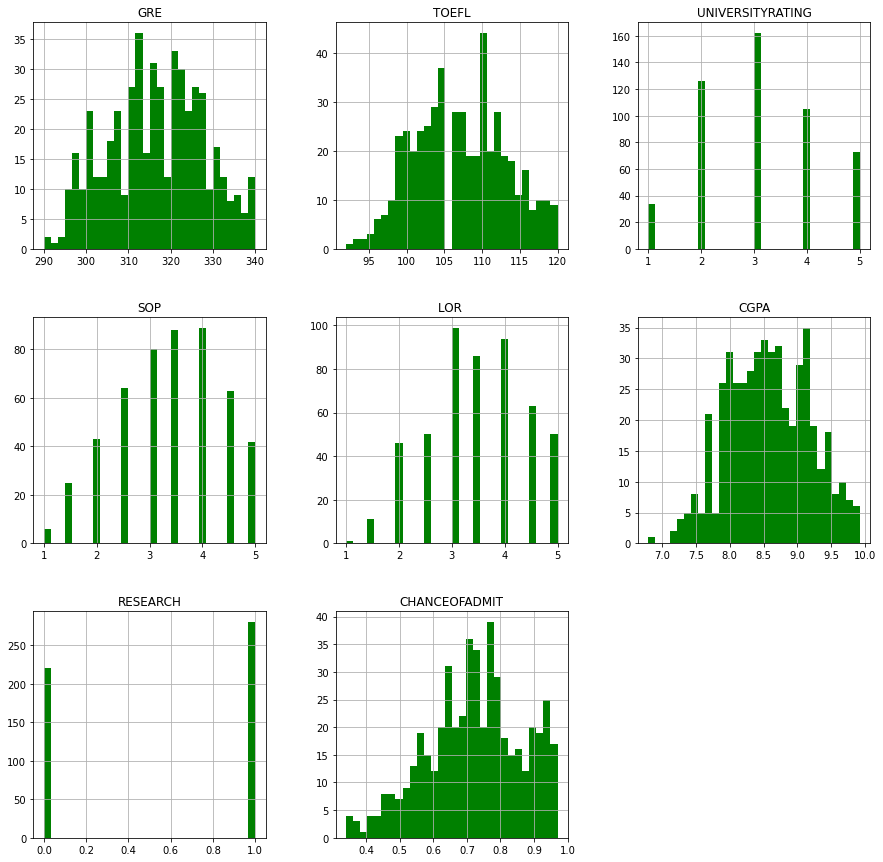

In [3]:
#vemos como se distribuyen los valores en cada campo:
df_sinserialnumber = df.drop(['SERIALNUMBER'], axis=1)
df_sinserialnumber.hist(bins = 30, figsize=(15,15), color = 'green')

<AxesSubplot:>

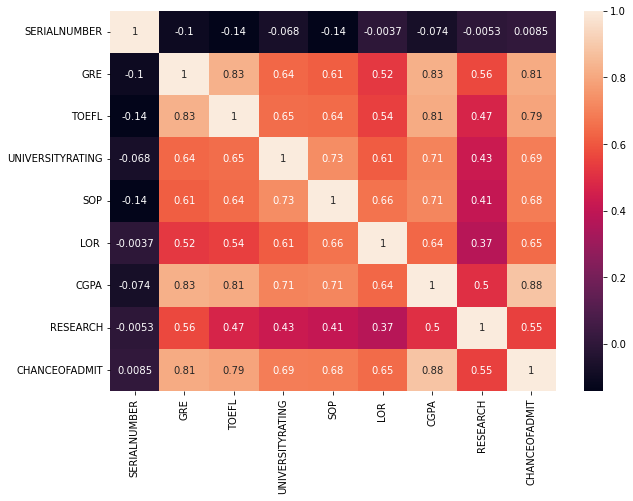

In [4]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(correlations, annot = True)

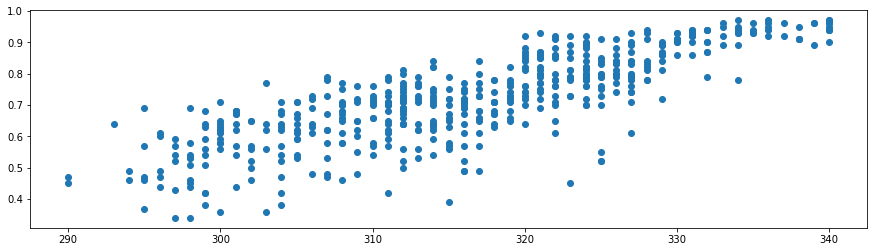

In [5]:
plt.figure(figsize = (15,4))
plt.scatter(df['GRE'], df['CHANCEOFADMIT'])
plt.show()

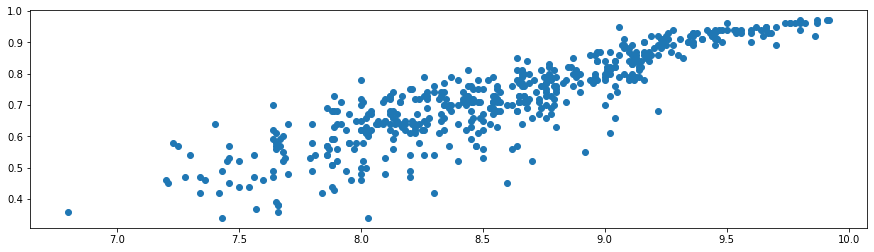

In [6]:
plt.figure(figsize = (15,4))
plt.scatter(df['CGPA'], df['CHANCEOFADMIT'])
plt.show()

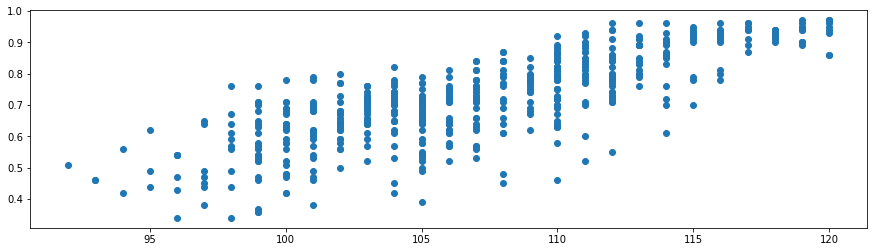

In [7]:
plt.figure(figsize = (15,4))
plt.scatter(df['TOEFL'], df['CHANCEOFADMIT'])
plt.show()

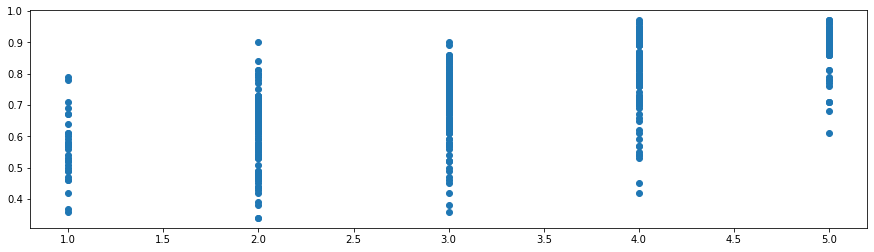

In [8]:
plt.figure(figsize = (15,4))
plt.scatter(df['UNIVERSITYRATING'], df['CHANCEOFADMIT'])
plt.show()

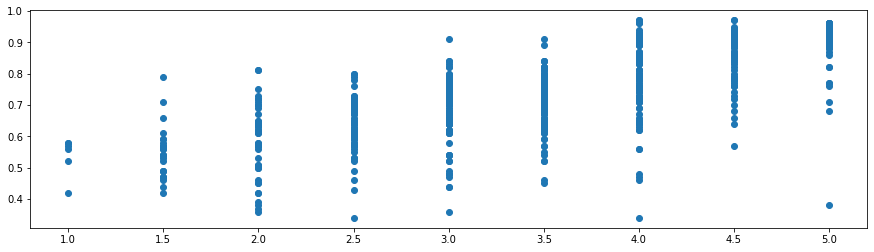

In [9]:
plt.figure(figsize = (15,4))
plt.scatter(df['SOP'], df['CHANCEOFADMIT'])
plt.show()

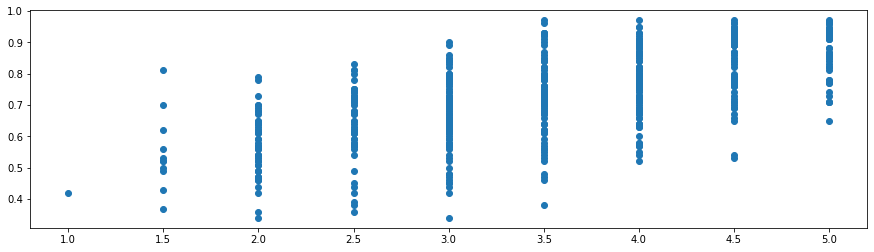

In [10]:
plt.figure(figsize = (15,4))
plt.scatter(df['LOR '], df['CHANCEOFADMIT'])
plt.show()

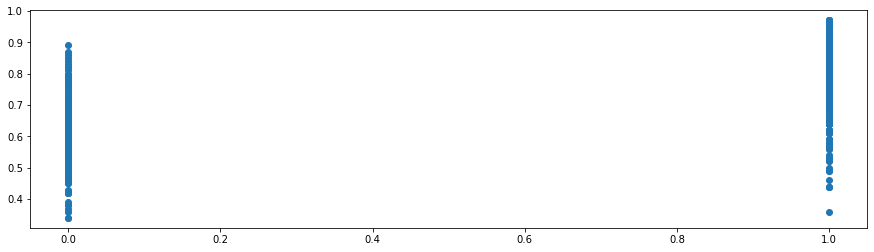

In [11]:
plt.figure(figsize = (15,4))
plt.scatter(df['RESEARCH'], df['CHANCEOFADMIT'])
plt.show()

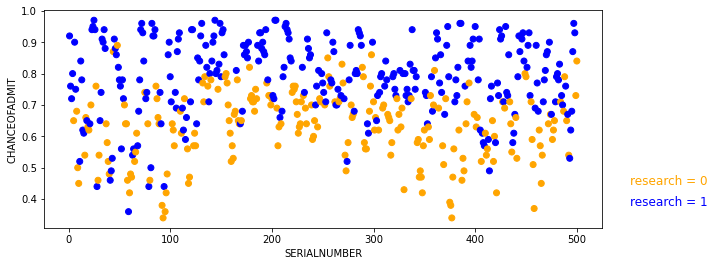

In [12]:
#vemos como se distribuyen los alumnos que tienen experiencia en investigación con el resto de resultados:
colors = []
for research in df['RESEARCH']:   
    if research:
        colors.append('blue')  # Valor True, color azul
    else:
        colors.append('orange')  # Valor False, color naranja
plt.figure(figsize = (10,4))
plt.scatter(df['SERIALNUMBER'], df['CHANCEOFADMIT'], c = colors)
plt.text(1.05, 0.1, 'research = 1', color='blue', transform=plt.gca().transAxes, fontsize=12)
plt.text(1.05, 0.2, 'research = 0', color='orange', transform=plt.gca().transAxes, fontsize=12)

plt.ylabel('CHANCEOFADMIT')
plt.xlabel('SERIALNUMBER')
plt.show()

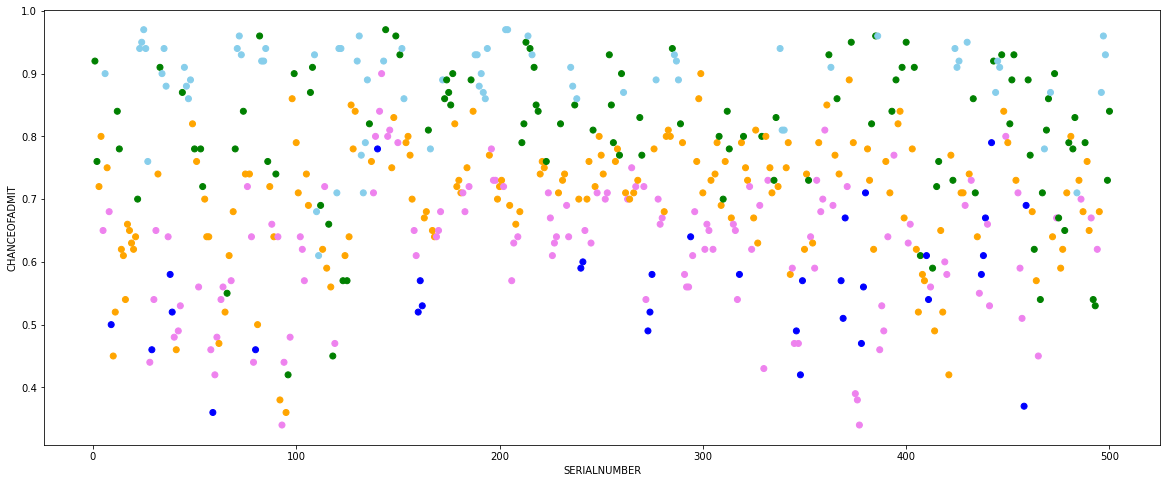

In [13]:
colors = []
for universidad in df['UNIVERSITYRATING']:   
    if universidad == 1:
        colors.append('blue')
    elif universidad == 2:
        colors.append('violet')
    elif universidad == 3:
        colors.append('orange')
    elif universidad == 4:
        colors.append('green')
    else:
        colors.append('skyblue')  
plt.figure(figsize = (20,8))
plt.scatter(df['SERIALNUMBER'], df['CHANCEOFADMIT'], c = colors, cmap = universidad)

plt.ylabel('CHANCEOFADMIT')
plt.xlabel('SERIALNUMBER')
plt.show()

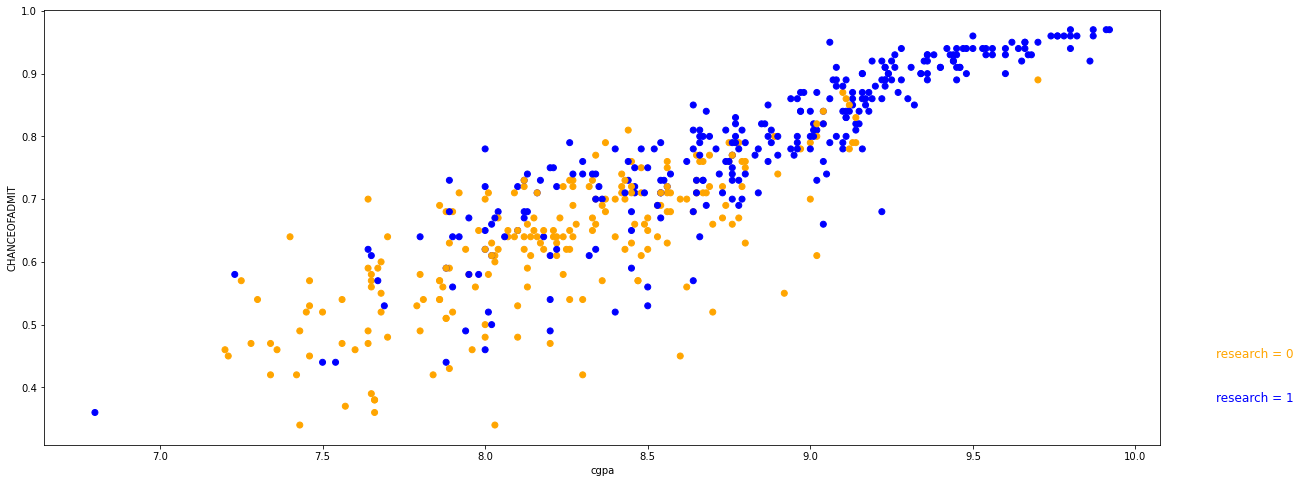

In [14]:
colors = []
for research in df['RESEARCH']:   
    if research:
        colors.append('blue')  # Valor True, color azul
    else:
        colors.append('orange')  # Valor False, color naranja
plt.figure(figsize = (20,8))
plt.scatter(df['CGPA'], df['CHANCEOFADMIT'], c = colors)
plt.text(1.05, 0.1, 'research = 1', color='blue', transform=plt.gca().transAxes, fontsize=12)
plt.text(1.05, 0.2, 'research = 0', color='orange', transform=plt.gca().transAxes, fontsize=12)

plt.ylabel('CHANCEOFADMIT')
plt.xlabel('cgpa')
plt.show()

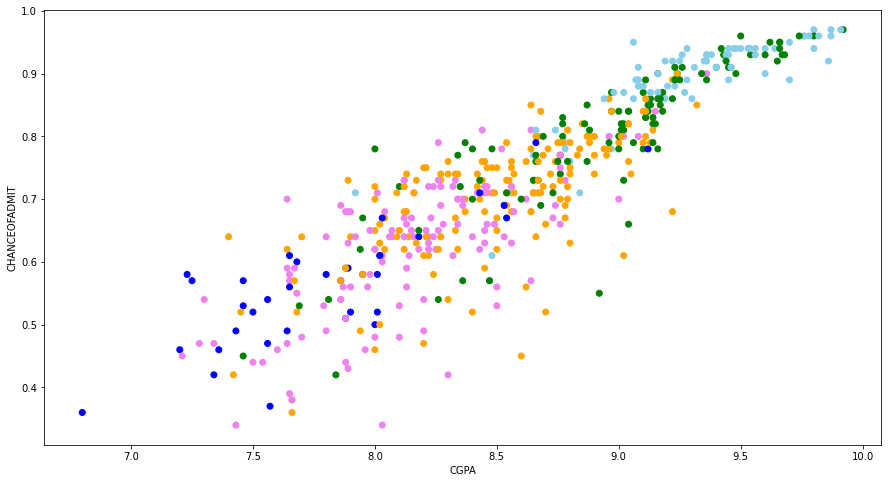

In [15]:
colors = []
for universidad in df['UNIVERSITYRATING']:   
    if universidad == 1:
        colors.append('blue')
    elif universidad == 2:
        colors.append('violet')
    elif universidad == 3:
        colors.append('orange')
    elif universidad == 4:
        colors.append('green')
    else:
        colors.append('skyblue')  
plt.figure(figsize = (15,8))
plt.scatter(df['CGPA'], df['CHANCEOFADMIT'], c = colors, cmap = universidad)

plt.ylabel('CHANCEOFADMIT')
plt.xlabel('CGPA')
plt.show()

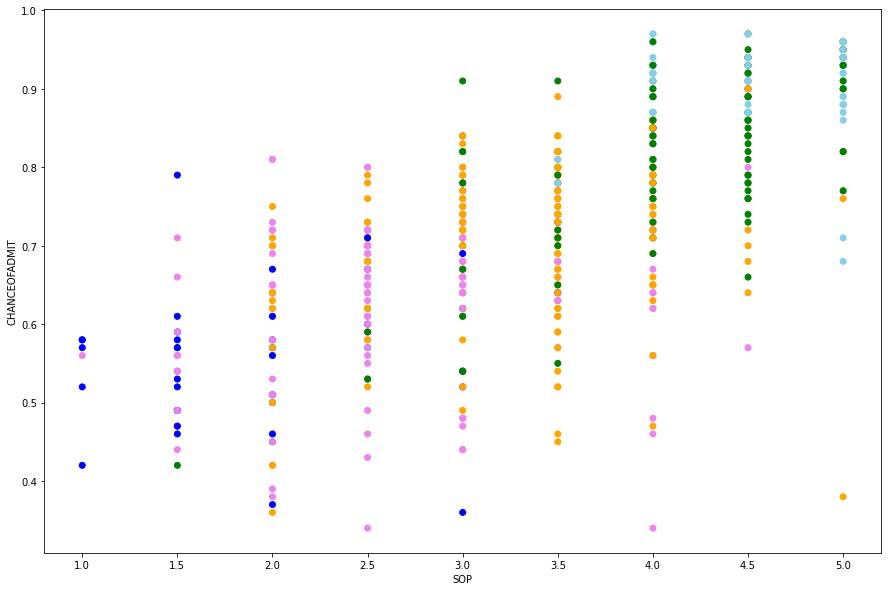

In [16]:
colors = []
for universidad in df['UNIVERSITYRATING']:   
    if universidad == 1:
        colors.append('blue')
    elif universidad == 2:
        colors.append('violet')
    elif universidad == 3:
        colors.append('orange')
    elif universidad == 4:
        colors.append('green')
    else:
        colors.append('skyblue')  
plt.figure(figsize = (15,10))
plt.scatter(df['SOP'], df['CHANCEOFADMIT'], c = colors, cmap = universidad)

plt.ylabel('CHANCEOFADMIT')
plt.xlabel('SOP')
plt.show()

In [17]:
#Una vez visto el comportamiento de las distintas variables pasamos a crear el modelo de regresión lineal

In [18]:
#asignar las variables x e y:
y = df['CHANCEOFADMIT']
x = df.drop(['CHANCEOFADMIT', 'SERIALNUMBER'], axis=1)

In [19]:
# dividir en conjunto de entrenamiento y prueba:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)

regresion_lineal = LinearRegression()
regresion_lineal.fit(x_train, y_train)

y_pred = regresion_lineal.predict(x_test)

In [20]:
x_train

,GRE,TOEFL,UNIVERSITYRATING,SOP,LOR,CGPA,RESEARCH
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [21]:
y_train

238    0.70
438    0.67
475    0.59
58     0.36
380    0.78
       ... 
255    0.79
72     0.93
396    0.84
235    0.88
37     0.58
Name: CHANCEOFADMIT, Length: 400, dtype: float64

In [22]:
#calculamos el coeficiente de determinacion:
r2 = r2_score(y_test, y_pred)
print(f"el coef de determinacion es: {r2}")

#calculamos el error cuadratico medio:
mse = mean_squared_error(y_test, y_pred)
print("la raiz del error cuadratico medio es: ", np.sqrt(mse))

el coef de determinacion es: 0.8208741703103734
la raiz del error cuadratico medio es:  0.05881410457650766


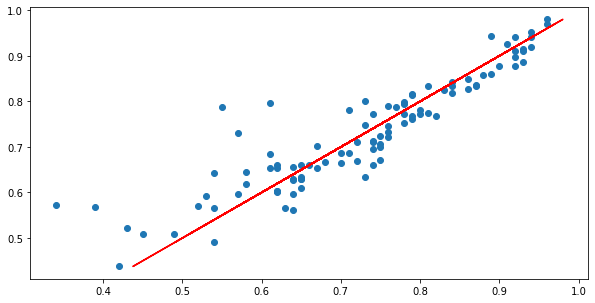

In [23]:
#grafico de dispersion:
plt.figure(figsize = (10,5))
plt.scatter(y_test, y_pred)
plt.plot(y_pred, y_pred, color='red')
plt.show()

In [24]:
df.head(5)

,SERIALNUMBER,GRE,TOEFL,UNIVERSITYRATING,SOP,LOR,CGPA,RESEARCH,CHANCEOFADMIT
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [25]:
#Hacemos una prueba con los valores iguales a las primeras 5 filas del dataset original, para ver la diferencia entre el
# resultado real y el resultado de la predicción

In [26]:
prueba = ({'GRE': [337,324,316,322,314], 'TOEFL': [118,107,104,110,103], 'UNIVERSITYRATING': [4,4,3,3,2], 'SOP': [4.5,4,3,3.5,2], 'LOR': [4.5,4.5,3.5,2.5,3], 'CGPA': [9.65,8.87,8,8.67,8.21], 'RESEARCH': [1,1,1,1,0]})
df_prueba = pd.DataFrame(prueba, index=[0,1,2,3,4])
df_prueba

,GRE,TOEFL,UNIVERSITYRATING,SOP,LOR,CGPA,RESEARCH
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [27]:
predicted_values = regresion_lineal.predict(df_prueba)
predicted_values

array([0.95230953, 0.80104525, 0.65177204, 0.74707669, 0.63320441])

In [28]:
#Lo mismo con los valores de las últimas 5 filas
df.tail(5)

,SERIALNUMBER,GRE,TOEFL,UNIVERSITYRATING,SOP,LOR,CGPA,RESEARCH,CHANCEOFADMIT
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [29]:
prueba = ({'GRE': [332,337,330,312,327], 'TOEFL': [108,117,120,103,113], 'UNIVERSITYRATING': [5,5,5,4,4], 'SOP': [4.5,5,4.5,4,4.5], 'LOR': [4,5,5,5,4.5], 'CGPA': [9.02,9.87,9.56,8.43,9.04], 'RESEARCH': [1,1,1,0,0]})
df_prueba = pd.DataFrame(prueba, index=[0,1,2,3,4])
df_prueba

,GRE,TOEFL,UNIVERSITYRATING,SOP,LOR,CGPA,RESEARCH
0,332,108,5,4.5,4.0,9.02,1
1,337,117,5,5.0,5.0,9.87,1
2,330,120,5,4.5,5.0,9.56,1
3,312,103,4,4.0,5.0,8.43,0
4,327,113,4,4.5,4.5,9.04,0


In [30]:
predicted_values = regresion_lineal.predict(df_prueba)
predicted_values

array([0.83680077, 0.98965535, 0.94867056, 0.70233634, 0.82703805])

In [31]:
#Aplicamos la función OLS para obtener los coeficientes y los p-values.
import statsmodels.api as sm
x_train = sm.add_constant(x_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=x_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          CHANCEOFADMIT   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Fri, 14 Jul 2023   Prob (F-statistic):          2.10e-142
Time:                        10:57:02   Log-Likelihood:                 559.27
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2887      0.118  

C:\Users\matia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


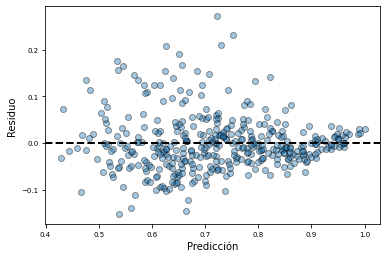

In [34]:
#Vemos el comportamiento de los residuos frente a la predicción
prediccion_train = modelo.predict(exog = x_train)
residuos_train   = prediccion_train - y_train

plt.scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
plt.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
plt.xlabel('Predicción')
plt.ylabel('Residuo')
plt.tick_params(labelsize = 7)

In [ ]:
#No se observa una distribución aleatoria con respecto a cero, lo que indica una posible falta de homoedasticidad

In [36]:
#Comprobamos mediante el test estadístico Shapiro-Wilk
from scipy import stats
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9360626935958862, pvalue=4.418316840865133e-12)

In [ ]:
#El p-value es menor a 0.05, se rechaza la hipótesis nula de que los datos siguen una distribución normal.
#Por lo tanto no hay homocedasticidad.